In [87]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve, ShuffleSplit, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 获取数据集 划分数据集

In [32]:
iris_data = datasets.load_iris()
data_x = iris_data.data 
data_y = iris_data.target
(data_x,data_y)

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

# 数据预处理
* 数据标准化

In [34]:
sc = StandardScaler()
data_x = sc.fit_transform(data_x)
data_x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# 网格搜索GridSearchCV
* 以SVM为例，使用网格搜索寻找最优参数，采用10折交叉验证

In [92]:
#划分训练集合测试集
x_train_std, x_test_std, y_train, y_test = train_test_split(data_x,data_y, test_size=0.2, random_state=20,stratify=data_y)


SVM = SVC(probability=True)
param_range = np.logspace(-2,2,20)
param_grid=[{'C': param_range, 'kernel': ['linear']},
            {'C': param_range, 'kernel': ['rbf'], 'gamma':param_range}]

estimator = GridSearchCV(SVM,
                        param_grid=param_grid,
                        cv=10,
                        scoring = 'accuracy'
                        )  
estimator.fit(x_train_std, y_train)
print("最佳参数：\n", estimator.best_params_)
print("最佳结果：\n", estimator.best_score_)
print("最佳估计器：\n", estimator.best_estimator_)

最佳参数：
 {'C': 0.01, 'kernel': 'linear'}
最佳结果：
 1.0
最佳估计器：
 SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


# 嵌套交叉验证

In [54]:
gs = GridSearchCV(SVM,
                 param_grid=param_grid,
                 cv=10,
                 scoring = 'accuracy'
                 ) 

#note here we input all the samples
scores = cross_val_score(gs, data_x, data_y, scoring='accuracy', cv=5)
print(scores,np.mean(scores),np.var(scores))

[0.93333333 1.         0.9        0.93333333 1.        ] 0.9533333333333334 0.0015999999999999994


# 验证曲线
* 编写一个函数，可以绘制模型的绘制验证曲线

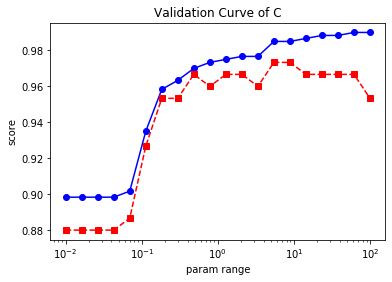

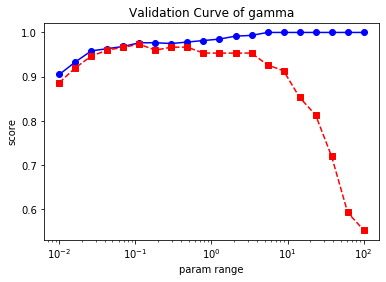

In [73]:
def Validation_Curve(estimator, data, target, param_name, param_range, fold = 10):
    train_scores, test_scores = validation_curve(estimator = estimator, X = data, y = target, param_name = param_name,
                                             param_range = param_range,cv = fold)
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores,axis = 1)
    test_mean = np.mean(test_scores,axis = 1)
    test_std = np.std(test_scores,axis =1)
    
    plt.title("Validation Curve of " +  param_name)
    plt.ylabel('score')
    plt.xlabel('param range')
    plt.xscale('log')
    
    plt.plot(param_range,train_mean,color = 'blue',marker = 'o',label = 'Training score')
    plt.plot(param_range,test_mean,color = 'red', linestyle = '--',marker = 's', label = 'Cross-validation score')

    plt.show()
    

Validation_Curve(SVC() , data_x , data_y, "C", np.logspace(-2,2,20) , 5)

Validation_Curve(SVC() , data_x , data_y, "gamma", np.logspace(-2,2,20) , 5)


# 学习曲线

G:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
G:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
G:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
G:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

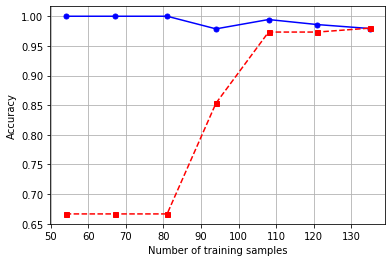

G:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
G:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
G:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
G:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimat

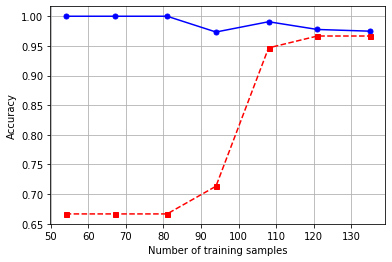

In [86]:
def Learn_Cruve(estimator, data, target, fold = 10):
    train_sizes,train_scores,test_scores = learning_curve(estimator = estimator, X = data, y = target,
                                                     train_sizes = np.linspace(0.1,1.0,10),
                                                     cv = fold)
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores,axis = 1)
    test_mean = np.mean(test_scores,axis = 1)
    test_std = np.std(test_scores,axis =1)
    
    plt.plot(train_sizes,train_mean,color = 'blue',marker = 'o',markersize = 5, label = 'training accuracy')
    plt.plot(train_sizes,test_mean,color = 'red',linestyle = '--',marker = 's',markersize = 5, label = 'validation accuracy')
    
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.show()

#传入网格搜索后得到的最优参数模型
Learn_Cruve(estimator.best_estimator_,data_x,data_y,10)

#传入默认参数模型
Learn_Cruve(SVC(),data_x,data_y,10)


# ROC曲线
* 使用前100个数据

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0.01540347 0.05294194 0.02058504 0.0296359  0.01003587 0.01375451
 0.01345365 0.02014877 0.03784922 0.03539586 0.01368285 0.01718323
 0.03811743 0.01506669 0.00693946 0.00370655 0.00932895 0.0189173
 0.02219515 0.00847192 0.04067558 0.01405294 0.00407148 0.06531174
 0.02297465 0.06894685 0.03341994 0.01929017 0.02362165 0.02751042
 0.04205816 0.05037288 0.00258972 0.00314293 0.04337253 0.02741875
 0.02333127 0.00718424 0.02551777 0.02289793 0.01510537 0.22681259
 0.01401695 0.03731485 0.01534458 0.0570997  0.00759852 0.01995362
 0.01203583 0.02467116 0.99223541 0.98356043 0.99560525 0.99136102
 0.99600785 0.98170581 0.98309076 0.91487475 0.99286213 0.96319223
 0.98013095 0.97722509 0.99374134 0.99001035 0.93585117 0.98872846
 0.97504229 0.96786942 0.99999657 0.97726881 0.98736831 0.98

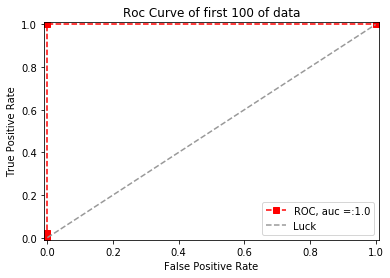

In [122]:
data_x = data_x[:100]
data_y = data_y[:100]

x_train_std, x_test_std, y_train, y_test = train_test_split(data_x,data_y, test_size=0.2, random_state=20,stratify=data_y)
estimator2=SVC(degree=3, gamma='scale', kernel='linear',C=0.01,probability=True)
estimator2.fit(x_train_std,y_train)
probas = estimator2.predict_proba(data_x)
print(data_y)
print(probas[:,1])
fpr,tpr,_ =roc_curve(data_y, probas[:,1])
auc_ = auc(fpr,tpr)
plt.plot(fpr, tpr, linestyle='--', color="red",marker = 's',
             label='ROC, auc =:{}'.format(auc_))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve of first 100 of data')
plt.legend(loc="lower right")
plt.show()